In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.ensemble import GradientBoostingRegressor
from joblib import Parallel, delayed
from sklearn.metrics import mean_absolute_error
%matplotlib inline 
import numpy as np
plt.rcParams['figure.figsize'] = (16, 4)
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#from utils import * # We've added all the functions from the last BLU to the utils.py 
import seaborn as sns

import numpy as np
from random import gauss
from random import seed
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import stattools
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 4)
import pmdarima as pm

import pandas as pd
import matplotlib.pyplot as plt
import warnings
idx = pd.IndexSlice
warnings.simplefilter(action='ignore', category=FutureWarning)   
from random import seed
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import GradientBoostingRegressor
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import stattools
import hashlib # for grading purposes
from sklearn.model_selection import ParameterGrid
import pmdarima as pm
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer




In [2]:
df_ = pd.read_csv('data/df_wf1_out.csv')
df = df_.copy()
df = df.set_index('date')
df = df.sort_index()
df.isnull().sum()
df

,wp,ws,day,month,hour,rolling_max,rolling_min,rolling_mean,rolling_std,df_logg_wp,df_logg_ws
date,,,,,,,,,,,
2009-07-01 01:00:00,0.0850,2.47,1,7,1,0.0850,0.0850,0.085000,0.000000,-2.465104,0.904218
2009-07-01 02:00:00,0.0200,2.40,1,7,2,0.0850,0.0200,0.052500,0.045962,-3.912023,0.875469
2009-07-01 03:00:00,0.0600,2.51,1,7,3,0.0850,0.0200,0.055000,0.032787,-2.813411,0.920283
2009-07-01 04:00:00,0.0450,2.73,1,7,4,0.0850,0.0200,0.052500,0.027234,-3.101093,1.004302
2009-07-01 05:00:00,0.0350,2.93,1,7,5,0.0850,0.0200,0.049000,0.024850,-3.352407,1.075002
...,...,...,...,...,...,...,...,...,...,...,...
2010-06-30 19:00:00,0.3960,7.25,30,6,19,0.8370,0.1082,0.427900,0.236670,-0.926341,1.981001
2010-06-30 20:00:00,0.6646,7.09,30,6,20,0.8370,0.1082,0.422175,0.228757,-0.408570,1.958685
2010-06-30 21:00:00,0.4480,6.63,30,6,21,0.8370,0.1082,0.406383,0.212069,-0.802962,1.891605


# Train test split

In [3]:
df.head()

,wp,ws,day,month,hour,rolling_max,rolling_min,rolling_mean,rolling_std,df_logg_wp,df_logg_ws
date,,,,,,,,,,,
2009-07-01 01:00:00,0.085,2.47,1,7,1,0.085,0.085,0.0850,0.000000,-2.465104,0.904218
2009-07-01 02:00:00,0.020,2.40,1,7,2,0.085,0.020,0.0525,0.045962,-3.912023,0.875469
2009-07-01 03:00:00,0.060,2.51,1,7,3,0.085,0.020,0.0550,0.032787,-2.813411,0.920283
2009-07-01 04:00:00,0.045,2.73,1,7,4,0.085,0.020,0.0525,0.027234,-3.101093,1.004302
2009-07-01 05:00:00,0.035,2.93,1,7,5,0.085,0.020,0.0490,0.024850,-3.352407,1.075002


In [11]:
#train and test split for both wp ans ws columns
train_wp = df.iloc[-49::-1,:].sort_index().drop('ws',axis =1)
train_ws_exog = df.iloc[-49::-1,1].sort_index().to_frame()
#test split
test_wp = df.iloc[-1:-25:-1,:].sort_index().drop('ws',axis = 1)
val_wp = df.iloc[-25:-49:-1,:].sort_index().drop('ws',axis = 1)
test_ws_exog = df.iloc[-1:-25:-1,1].sort_index().to_frame()
val_ws_exog = df.iloc[-25:-49:-1,1].sort_index().to_frame()

test_ws_exog 

,ws
date,
2010-06-30 00:00:00,6.59
2010-06-30 01:00:00,5.50
2010-06-30 02:00:00,4.51
2010-06-30 03:00:00,3.82
2010-06-30 04:00:00,3.55
2010-06-30 05:00:00,3.52
2010-06-30 06:00:00,3.54
2010-06-30 07:00:00,3.47
2010-06-30 08:00:00,3.44


# Befor modelling we do need to make time series stationary(we do log part but diff part will be done in the model)

# AutoARIMA

In [22]:
train_wp

,wp
date,
2009-07-01 01:00:00,0.085
2009-07-01 02:00:00,0.020
2009-07-01 03:00:00,0.060
2009-07-01 04:00:00,0.045
2009-07-01 05:00:00,0.035
...,...
2010-06-29 19:00:00,0.737
2010-06-29 20:00:00,0.802
2010-06-29 21:00:00,0.827


#sarimax = pm.AutoARIMA(trace=True, supress_warnings=True,m=24)#m=12 because of seasonality we need to change according to that
#sarimax.fit(train_wp.values)
#sarimax_forecast = sarimax.predict(24)#24 is len(test). This model predict 24 times after training set which is test set
#sf = np.exp(sarimax_forecast)
#In sample prediction 
#predictions =np.exp(sarimax.predict_in_sample())
#mae =mean_absolute_error(np.exp(sarimax_forecast),np.exp(test_wp))
sarimax_pipeline_exog = Pipeline([  #The boxcox transform has been removed because it messes with the exogenous input
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24, 
                           method='nm',
                           maxiter=1,
                           
                          )
    )
])

sarimax_pipeline_exog.fit(train_wp,train_ws_exog) 

# Multiple one-step forecast

In [13]:
#sarimax_forecast_one_step_refit = []
#sarimax.fit(train)        # Note that we're fitting the autoArima again. This is to make sure you always 
#for i in np.arange(0,24): # run it before the rest of the loop
    #next_step_forecast = sarimax.predict(1)[0]
    #sarimax_forecast_one_step_refit.append(next_step_forecast)
    #sarimax = sarimax.update(test[i:i+1])
#mean_absolute_error(np.exp(sarimax_forecast_one_step_refit),np.exp(test))

# Multi step forcast

In [14]:
#orecast = np.exp(sarimax.predict(3*12,emissions_test[:]))#3*12 is the size of test considering seasonality
#mae = mean_absolute_error(forecast,emissions_test)

# multiple one-step forecasts with exog input

sarimax_forecast_one_step_refit = []
sarimax.fit(train_wp,train_ws_exog) 
for i in np.arange(0,len(test_ws_exog)): 
    next_step_forecast = sarimax.predict(1,test_ws_exog[i:i+1])[0]
    sarimax_forecast_one_step_refit.append(next_step_forecast)
    sarimax = sarimax.update(test_wp[i:i+1],test_ws_exog[i:i+1])
#MAE
sarimax_forecast_one_step_refit_exp = np.exp(sarimax_forecast_one_step_refit)
mae = mean_absolute_error(sarimax_forecast_one_step_refit_exp,test_ws_exog)


# Boxcox Transformation

In [15]:
train_wp

,wp
date,
2009-07-01 01:00:00,0.085
2009-07-01 02:00:00,0.020
2009-07-01 03:00:00,0.060
2009-07-01 04:00:00,0.045
2009-07-01 05:00:00,0.035
...,...
2010-06-29 19:00:00,0.737
2010-06-29 20:00:00,0.802
2010-06-29 21:00:00,0.827


In [ ]:
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(train_wp, exog=train_ws_exog, trend='n', order=(0,1,0), seasonal_order=(1,1,1,52))
results = mod.fit()

#sarimax_predictions = np.exp(sarimax_results.predict())[24:] # grab the prediction from our model and undo the log transform using exp

In [ ]:
predictions = results.predict(test_wp, exog=test_ws_exog, dynamic= True)

In [7]:
# find the best transformation to unskew our distribution.
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

#sarimax_pipeline = Pipeline([
 #   ('boxcox', BoxCoxEndogTransformer(lmbda2=1)),
  #  ('arima', pm.AutoARIMA(trace=True,
   #                        suppress_warnings=True,
    #                       m=24, 
     #                      method='nm', # More data means longer let's use 'nm' to make it faster
      #                     maxiter=20, # Let's also reduce maxiter to make it faster.
       #                    
        #                  )
    #)
#])

#sarimax_pipeline.fit(train)
#mean_absolute_error(sarimax_pipeline.predict(24),test)

#find the best transformation to unskew our distribution but with exogenous data
#(we need to do same preprocessing for exogenous data)

sarimax_pipeline_exog = Pipeline([  #The boxcox transform has been removed because it messes with the exogenous input
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24,
                           method='nm',
                           maxiter=20,
                           
                          )
    )
])

sarimax_pipeline_exog.fit(train_wp,train_ws_exog)
#predict in sample
sarimax_pipeline_exog.predict_in_sample(train_ws_exog)
#predict test
sarimax_pipeline_exog.predict(24,test_ws_exog)
#predict test with confident interval
preds = sarimax_pipeline_exog.predict(24,test_ws_exog[:24], return_conf_int=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-19328.475, Time=21.29 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-19056.328, Time=0.96 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-19095.212, Time=18.39 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-19097.923, Time=18.92 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-18817.984, Time=1.55 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-19348.811, Time=19.57 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=-19349.902, Time=2.30 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-19348.967, Time=20.78 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=-19164.396, Time=2.25 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=-19137.295, Time=1.74 sec
 ARIMA(3,1,2)(0,0,0)[24] intercept   : AIC=-19047.790, Time=2.39 sec
 ARIMA(2,1,3)(0,0,0)[24] intercept   : AIC=-19365.308, Time=2.97 sec
 ARIMA(2,1,3)(1,0,0)[24] intercept   : AIC=-19372.398, Time=21.65 sec
 ARIMA(2,1,3)(2,0,0)[24] intercept   : AIC=-19383.409,

KeyboardInterrupt: 

# Predicting the Test

In [31]:
from numpy import asarray
from numpy import savetxt
pred_test = sarimax_pipeline_exog.predict(24,test_ws_exog[:24], return_conf_int=True)
pred_test[0]
savetxt('pred_wf2.csv', pred_test[0], delimiter=',')

SyntaxError: can't use starred expression here (<ipython-input-31-a32bbec234b3>, line 6)

# Plotting the prediction

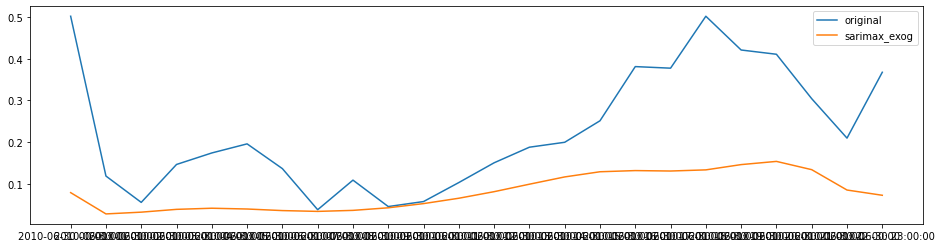

In [22]:
plt.plot(test_wp, label='original')
plt.plot(test_wp.index, pred_test[0], label='sarimax_exog')
plt.legend()

# Some functions usefull for modeling

In [12]:
def build_target(series_, number_of_periods_ahead):
    """ 
    takes a series, turned it into a dataframe, and adds a new column called target
    This column is the input series, lagged number_of_periods_ahead into the future
    """
    
    # make a copy 
    series_ = series_.copy()
    series_.name = 'customers'
    
    # make a dataframe from the series
    df_ = pd.DataFrame(series_)
    
    # the target column will be the input series, lagged into the future
    df_['target'] = series_.shift(-number_of_periods_ahead)
    return df_

In [13]:
def separate_last_day(df_):
    
    """
    takes a dataset which has the target and features built 
    and separates it into the last day
    """
    # take the last period 
    last_period = df_.iloc[-1]
    
    # the last period is now a series, so it's name will be the timestamp
    training_data = df_.loc[df_.index < last_period.name]

    return last_period, training_data

In [14]:
def build_some_features(df_, num_periods_lagged=1, num_periods_diffed=0, weekday=False, month=False, rolling=[], holidays=False): 
    """
    Builds some features by calculating differences between periods  
    """
    # make a copy 
    df_ = df_.copy()
        
    # for a few values, get the lags  
    for i in range(1, num_periods_lagged+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s' % str(i)] = df_['customers'].shift(i)
        
    # for a few values, get the diffs  
    for i in range(1, num_periods_diffed+1):
        # make a new feature, with the lags in the observed values column
        df_['diff_%s' % str(i)] = df_['customers'].diff(i)
    
    for stat in rolling:
        df_['rolling_%s'%str(stat)] = df_['customers'].rolling('7D').aggregate(stat)
        
    if weekday == True:
        df_['sin_weekday'] = np.sin(2*np.pi*df_.index.weekday/7)
        df_['cos_weekday'] = np.sin(2*np.pi*df_.index.weekday/7)
        
    if month == True:
        df_['sin_month'] = np.sin(2*np.pi*df_.index.month/12)
        df_['cos_month'] = np.sin(2*np.pi*df_.index.month/12)
        
    if holidays == True:
        holidays = df_[((df_.index.month==12) & (df_.index.day==25))
              |((df_.index.month==1) & (df_.index.day==1))].customers
        df_['holidays'] = holidays + 1
        df_['holidays'] = df_['holidays'].fillna(0)
    
    return df_

In [15]:
def separate_train_and_test_set(last_period_, training_data_, target='target'): 
    
    """ 
    separates training and test set (clue was in the name, really... )
    Ok, we were lazy and left the target hardcoded as 'target'. Shame on us. 
    """
    
    # anything that isn't a target is a feature 
    features = [feature for feature in training_data_.columns if feature != target]
    
    # adding a sneaky little dropna to avoid the missing data problem above 
    X_train = training_data_.dropna()[features]
    y_train = training_data_.dropna()[target]
    
    X_last_period = last_period_[features]
    
    return X_train, y_train, X_last_period

In [16]:
def prepare_for_prediction(series_, number_of_periods_ahead, num_periods_lagged, num_periods_diffed, weekday, month, rolling, holidays):
    
    """ 
    Wrapper to go from the original series to X_train, y_train, X_last_period 
    
    """
    
    # build the target 
    data_with_target = build_target(series_, 
                                    number_of_periods_ahead)
    
    # build the features 
    data_with_target_and_features = build_some_features(data_with_target, 
                                                        num_periods_lagged=num_periods_lagged,
                                                       num_periods_diffed=num_periods_diffed,
                                                       weekday=weekday,
                                                       month=month,
                                                       rolling=rolling,
                                                       holidays=holidays)
    # separate train and test data 
    last_period, training_data = separate_last_day(data_with_target_and_features)

    # separate X_train, y_train, and X_test 
    X_train, y_train, X_last_period = separate_train_and_test_set(last_period, 
                                                           training_data, 
                                                           target='target')
    
    # return ALL OF THE THINGS! (well, actually just the ones we need)
    return X_train, y_train, X_last_period 

In [17]:
def predict_period_n(series_, model, number_of_periods_ahead, num_periods_lagged, num_periods_diffed, weekday, month, rolling, holidays): 
    
        X_train, y_train, X_last_period = prepare_for_prediction(series_, 
                                                             number_of_periods_ahead, 
                                                             num_periods_lagged,
                                                             num_periods_diffed,
                                                             weekday,
                                                             month,
                                                             rolling,
                                                             holidays)
        
        model.fit(X_train, y_train)
        return model.predict(X_last_period.values.reshape(1, -1))

In [18]:
def predict_n_periods(series_, n_periods, model, num_periods_lagged, num_periods_diffed=0, weekday=False, month=False,rolling=[], holidays=False): 
    predictions = []

    for period_ahead in range(1, n_periods+1):
        pred = predict_period_n(series_=series_, 
                                model=model, 
                                number_of_periods_ahead=period_ahead, 
                                num_periods_lagged=num_periods_lagged,
                                num_periods_diffed=num_periods_diffed,
                                weekday=weekday,
                                month=month,
                                rolling=rolling,
                                holidays=holidays)
        
        predictions.append(pred[0])
        
    return predictions 

# Validation, which model parameters are better 

In [19]:
from sklearn.model_selection import ParameterGrid
param_grid = {'model': [ GradientBoostingRegressor()], 
              'num_periods_lagged':np.arange(1,3),
              'num_periods_diffed':[0],
              'weekday':[True,False],
              'month':[True,False],
              'holidays': [True],
              'rolling' : [[np.mean,np.min,np.max,np.std]]
             }

grid = ParameterGrid(param_grid)

###Seperate train test and validation
error_lst = []

for params in tqdm(grid):
    predictions = predict_n_periods(series_=train_wp, 
                    n_periods=24, 
                      model=params['model'], 
                      num_periods_lagged=params['num_periods_lagged'],
                      num_periods_diffed=params['num_periods_diffed'],
                      weekday=params['weekday'],
                      month=params['month'],
                      rolling=[np.mean,np.max,np.min]
                    )

    error_lst.append(mean_absolute_error(val,predictions))
pd.Series(error_lst).idxmin()

ValueError: Wrong number of items passed 10, placement implies 1

# Testing the modell

In [ ]:
#adding train and validation
train = train.append(val)

predictions = predict_n_periods(series_=train, 
                  n_periods=len(test), 
                  model=GradientBoostingRegressor(), 
                  num_periods_lagged=2,
                  num_periods_diffed=0,
                  weekday=True,
                  month=False,
                  rolling=[np.mean,np.min,np.max,np.std],
                  holidays=True
                  )
mean_absolute_error(test,predictions)

# K-Fold Cross Validation

In [ ]:
#This is not good at all. We will have data lekage with this kind of cross validation we need to use other methods 
#Import TimeSeriesSplit
#from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
#cv = KFold(n_splits=10)

# Iterate through CV splits
#fig, ax = plt.subplots()
#for ii, (tr, tt) in enumerate(cv.split(store_train/store_train.max())):
    # Plot the training data on each iteration, to see the behavior of the CV
    #ax.plot(store_train.index[tr], ii + store_train[tr]/store_train.max(), color='green')
    #ax.plot(store_train.index[tt], ii + store_train[tt]/store_train.max(), color='orange')

#ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
#plt.show()

# Expanding Window cross validation

In [ ]:
#the fold for validation are similar to k-fold cross validation but it doese not consider the training set after the validation
#set so we do not have data lekage in this case
#This is better than k-fold...

# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=20)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(store_train/store_train.max())):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(store_train.index[tr], ii + store_train[tr]/store_train.max(), color='green')
    ax.plot(store_train.index[tt], ii + store_train[tt]/store_train.max(), color='orange')

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()


In [ ]:
#Train the modell using expandig windows cross validation and see with different train and validation this cross validation consider,
#what happend to the mean absolute error
X = store_train

# Iterate through CV splits
n_splits = 20
cv = TimeSeriesSplit(n_splits=n_splits)

idx_lst = []
values_lst = []

for ii, (tr, tt) in tqdm(enumerate(cv.split(X))):
    # Fit the model on training data and collect the coefficients
    train = X[tr]
    test = X[tt]
    idx_lst.append(X.index[tt][0])
    error_lst = []
    predictions = predict_n_periods(series_=train, 
                    n_periods=len(test), 
                    model=GradientBoostingRegressor(n_estimators=20, learning_rate=0.5), 
                    num_periods_lagged=2,
                    num_periods_diffed=0,
                    weekday=True,
                    month=False)
    values_lst.append(mean_absolute_error(test,predictions))
    pd.Series(values_lst, index=idx_lst).plot()

In [3]:
! explorer.exe.

/bin/bash: explorer.exe.: command not found


In [4]:
!explorer.exe .